## Approach of the problem
* Load the Libraries and Data (NLTK, Gensim, Spacy)
* Data Preparation and Transformation
    * Tokenization
    * Remove Special Characters
    * Lemmatization / Stemming
    * Remove stopwords
    * Convert Lower case
* Vectorization (Gensim, Sklearn, Keras)
    * Count Vectorizer
    * TF - IDF Vectorizer
    * Word2rec
    * Embedding (Keras)
* Build a model
    * ML Model (Boosting, Bagging)
    * Deep Learning (Denselayer, RNN, LSTM)
* Evaluate

In [ ]:
!unzip '/content/archive (16).zip'

Archive:  /content/archive (16).zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
data = pd.read_csv('/content/spam.csv',encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Drop off the inconsistent columns

In [5]:
data_1 = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.columns = ['label','text']

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


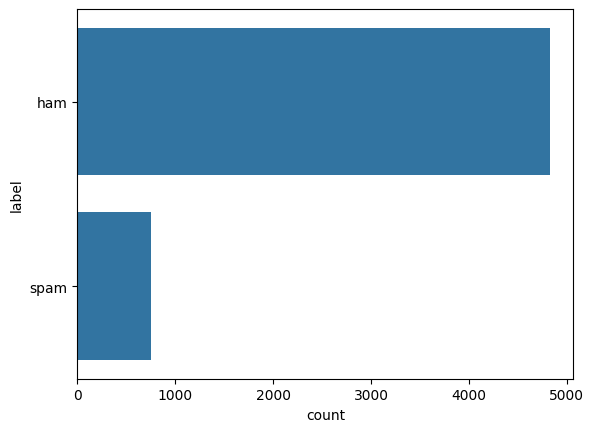

In [9]:
sns.countplot(data['label'])
plt.show()

In [10]:
def data_prep(text):
  text =re.sub('[^a-zA-Z]',' ',text)
  text = text.lower()
  text = word_tokenize(text)
  lemmmatize = nltk.WordNetLemmatizer()
  text = [lemmmatize.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
  text = ' '.join(text)
  return text

In [11]:
data_1= data['text'].apply(data_prep)

In [12]:
data_1[2]

'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply'

* Using TF-IDF preprocess the data

In [13]:
vect = TfidfVectorizer()
x = vect.fit_transform(data['text'])

In [14]:
y =data['label']

In [15]:
x.shape

(5572, 8672)

In [16]:
# prompt: split the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [17]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

y_pred = nb_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9623318385650225

Confusion Matrix:
 [[965   0]
 [ 42 108]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=42)

gb_classifier.fit(x_train, y_train)

y_pred_gb = gb_classifier.predict(x_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", accuracy_gb)
print("\nConfusion Matrix:\n", conf_matrix_gb)
print("\nClassification Report:\n", classification_rep_gb)


Gradient Boosting Accuracy: 0.9730941704035875

Confusion Matrix:
 [[964   1]
 [ 29 121]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.99      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", classification_rep_rf)


Random Forest Accuracy: 0.9766816143497757

Confusion Matrix:
 [[965   0]
 [ 26 124]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

nb_classifier_resampled = MultinomialNB()
nb_classifier_resampled.fit(x_train_resampled, y_train_resampled)

y_pred_resampled = nb_classifier_resampled.predict(x_test)

accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)
classification_rep_resampled = classification_report(y_test, y_pred_resampled)

print("Accuracy (after SMOTE):", accuracy_resampled)
print("\nConfusion Matrix:\n", conf_matrix_resampled)
print("\nClassification Report:\n", classification_rep_resampled)


Accuracy (after SMOTE): 0.9748878923766816

Confusion Matrix:
 [[951  14]
 [ 14 136]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.91      0.91      0.91       150

    accuracy                           0.97      1115
   macro avg       0.95      0.95      0.95      1115
weighted avg       0.97      0.97      0.97      1115



In [21]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing

In [22]:
import gradio as gr

def predict_text(text):
    preprocessed_text = data_prep(text)
    vectorized_text = vect.transform([preprocessed_text])
    prediction = nb_classifier.predict(vectorized_text)
    return "spam" if prediction == "spam" else "ham"

iface = gr.Interface(
    fn = predict_text,
    inputs = gr.Textbox(lines = 5,placeholder = "enter your text message here"),
    outputs = "text",
    title="Spam Detection APP",
    description="Enter a text message and get a prediction on whether it's spam or not."
)

iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9b63ab291380d215e0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


RNN Based Model

In [23]:
from keras.models import Sequential
from keras.layers import SimpleRNN,Dense,Embedding,LSTM,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Tokenize the text

In [40]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])

In [41]:
vocab = tokenizer.word_index
vocab

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'on': 18,
 '2': 19,
 'that': 20,
 'now': 21,
 'are': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'do': 27,
 'can': 28,
 'at': 29,
 "i'm": 30,
 'get': 31,
 'be': 32,
 'will': 33,
 'if': 34,
 'ur': 35,
 'with': 36,
 'just': 37,
 'no': 38,
 'we': 39,
 'this': 40,
 'gt': 41,
 '4': 42,
 'lt': 43,
 'up': 44,
 'when': 45,
 'ok': 46,
 'free': 47,
 'from': 48,
 'how': 49,
 'go': 50,
 'all': 51,
 'out': 52,
 'what': 53,
 'know': 54,
 'like': 55,
 'good': 56,
 'then': 57,
 'got': 58,
 'was': 59,
 'come': 60,
 'its': 61,
 'am': 62,
 'time': 63,
 'only': 64,
 'day': 65,
 'love': 66,
 'there': 67,
 'send': 68,
 'he': 69,
 'want': 70,
 'text': 71,
 'as': 72,
 'txt': 73,
 'one': 74,
 'going': 75,
 'by': 76,
 'home': 77,
 "i'll": 78,
 'need': 79,
 'about': 80,
 'r': 81,
 'lor': 82,
 'sorry': 83,
 'stop': 84,
 'st

In [42]:
len(vocab)

8920

Padding

In [43]:
max_length = 100
x = pad_sequences(sequences,maxlen=max_length)

In [44]:
x.shape

(5572, 100)

split the train and test

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=123)

In [46]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 100)
(1115, 100)
(4457,)
(1115,)


In [47]:
y_train = [1 if labels =='spam' else 0 for labels in y_train]
y_test = [1 if labels =='spam' else 0 for labels in y_test]
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [48]:
print(y_train)
print(y_test)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Model the data

In [49]:
model = Sequential()
model.add(Embedding(input_dim=max_words,output_dim=100,input_length=100))
model.add(SimpleRNN(units=64))
model.add(Dense(units=2,activation='sigmoid'))

In [50]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
hist = model.fit(x_train,y_train,epochs=25,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.8802 - loss: 0.3353 - val_accuracy: 0.9821 - val_loss: 0.0612
Epoch 2/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.9890 - loss: 0.0456 - val_accuracy: 0.9758 - val_loss: 0.0715
Epoch 3/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9956 - loss: 0.0188 - val_accuracy: 0.9865 - val_loss: 0.0485
Epoch 4/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9993 - loss: 0.0068 - val_accuracy: 0.9874 - val_loss: 0.0539
Epoch 5/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.9996 - loss: 0.0043 - val_accuracy: 0.9874 - val_loss: 0.0525
Epoch 6/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.9848 - val_loss: 0.0539
Epoch 7/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9997 - loss: 0.0027 - val_accuracy: 0.9883 - val_loss: 0.0539
Epoch 8/25
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9998 - loss: 0.0011 - val_acc

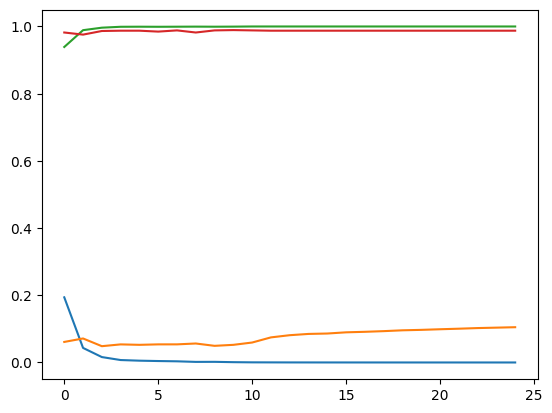

In [52]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [53]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
print(y_pred)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
[[9.9996960e-01 4.3990436e-05]
 [9.3834442e-06 9.9998474e-01]
 [9.9998468e-01 2.0644709e-05]
 ...
 [9.9998790e-01 1.7124516e-05]
 [9.9999511e-01 8.3424657e-06]
 [9.9997032e-01 3.6414622e-05]]


In [62]:
y_test = np.argmax(y_test,axis=1)
y_pred = np.argmax(y_pred,axis=1)

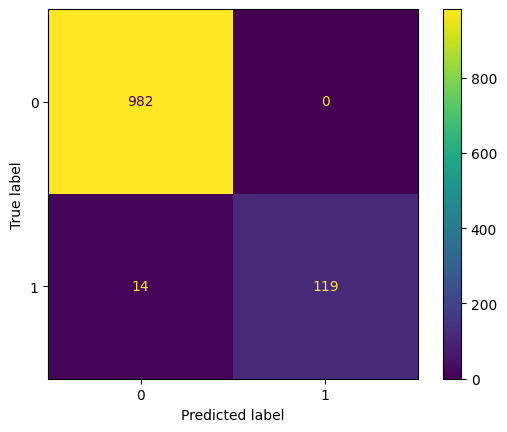

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       982
           1       1.00      0.89      0.94       133

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [66]:
# prompt: now built app using gradio to predict

import numpy as np
def predict_email(email):
  sequence = tokenizer.texts_to_sequences([email])
  padded_sequence = pad_sequences(sequence,maxlen=max_length)
  prediction = model.predict(padded_sequence)
  label = np.argmax(prediction)
  return "spam" if label == 1 else "ham"

iface = gr.Interface(
    fn=predict_email,
    inputs=gr.Textbox(lines=5, placeholder="Enter your email here"),
    outputs="text",
    title="Email Spam Detection App",
    description="Enter an email and get a prediction on whether it's spam or ham."
)

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://02c64ac052c3588d6a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
